# Ensemble Method

## VotingClassifier: 여러개의 클래스가 투표
## Bagging: 훈련 샘플을 여러 번 사용하여 훈련
    RandomForest =Bagging + DecisionTree
    ExtraTree
## Boosting
    Adaboosting(에이다 부스트)
    Gradient Boosting
    XGBoost
편향은 비슷, 분산은 감소한다.
    

In [2]:
#데이터 준비
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500, noise = 0.30, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
# 보팅 클래스: 랜덤포레스트, 로지스틱 회귀, 결정트리

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
dt_clf= DecisionTreeClassifier(max_depth=3, random_state=42)

In [4]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('dt', dt_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42))])

In [6]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


# OOB(Out-of-bag) 평가
    배깅에서 어떤 데이터는 이용되지 않을 수 있다.
    일반적으로 훈련할 때 사용하는 데이터는 63%정도
    나머지는 oob
    훈련할 때 이 데이터를 사용하지 않으므로 마지막 테스트 데이터로 이용
    oob_score=True로 해주면 훈련이 끝난 후 자동으로 oob평가 수행
   

In [9]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('dt', dt_clf)],
    voting='soft')

for clf in (log_clf, rnd_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


In [11]:
from sklearn.ensemble import BaggingClassifier
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)

#oob-score 출력
print("oob_score", bag_clf.oob_score_)

#decisiontree bagging
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

oob_score 0.8986666666666666


0.912

# XGBoost(Extreme Gradient Boosting)

XGBoost Gradient Boosting보다 빠르며 과적합 방지가 가능한 규제를 포함하고 있다.

In [13]:
import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators=100, max_depth=3,
                                random_state=42,
                               eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.872

# SVM(Support Vector Machine)

커널 서포트 벡터 머신은 입력 데이터에서 단순한 초평면으로 정의되지 않느 ㄴ더 복잡한 모델을 만들 수 있도록 확장한 것이다.

In [24]:
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family=font_name)

Text(0, 0.5, '특성 1')

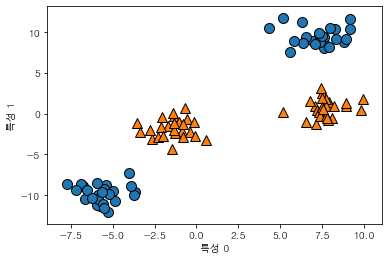

In [25]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y= y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
#선형적으로 구분되지 않는 클래스를 가진 이진 분류 데이터셋

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, '특성 1')

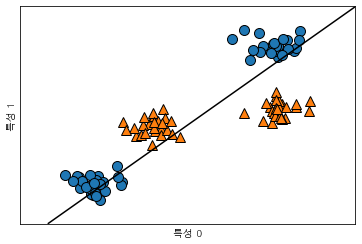

In [26]:
linear_svm = LinearSVC().fit(X,y)

#선형 SVM으로 만들어진 결정 경계
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0.5, 0, '특성 1 ** 특성 2')

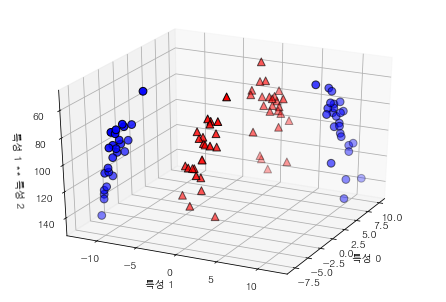

In [27]:
#특성 추가
#두 번째 특성을 제곱하여 추가한 후 3차원으로 투영
import numpy as np
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
#3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
#y==0인 포인트를 먼저 그리고 그 다음 y==1인 포인트를 그린다
mask =y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[mask, 2], c='r', marker='^',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1 ** 특성 2")

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, '특성1 ** 2')

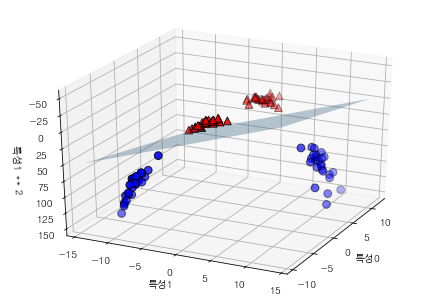

In [28]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_


# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")
#확장된 3차원 데이터셋에서 선형 SVM이 만든 결정경계

Text(0, 0.5, '특성 1')

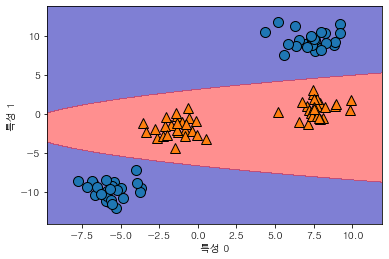

In [30]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
#원래 2개 특성에 투영한 결정경계

학습이 진행되는 동안 SVM은 각 훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지 배운게 된다.
일반적으로 훈련 데이터의 일부(두 클래스 사이의 경계에 위치한 데이터 포인트들)만 결정 경계를 만드는데 영향을 준다.
이런 데이터 포인터를 서포트 벡터라고 한다.

Text(0, 0.5, '특성 1')

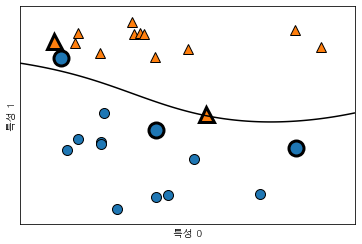

In [36]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
#데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
#서포트 벡터
sv = svm.support_vectors_
#dual_coef의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됨
sv_labels = svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:, 0], sv[:,1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
#RBF 커널을 사용한 SVM으로 만든 결정 경계와 서포트 벡터

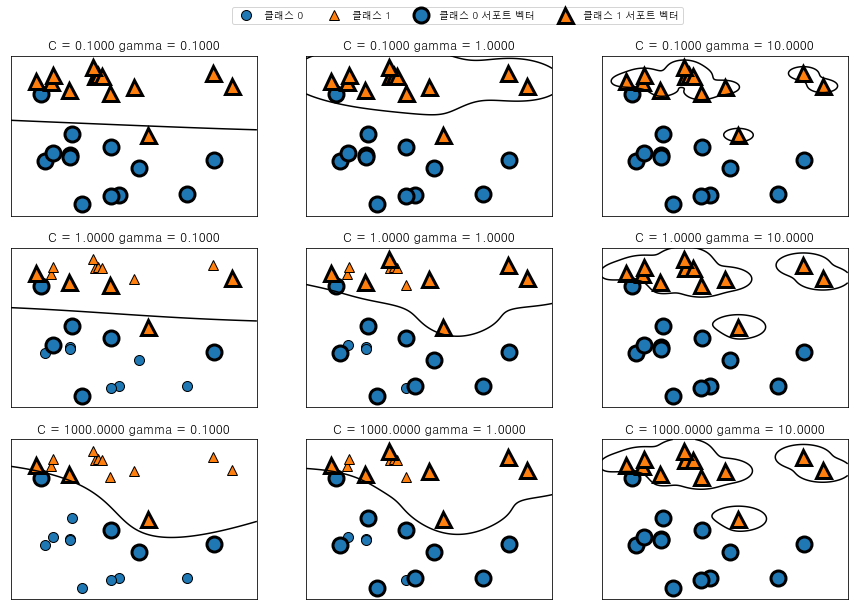

In [38]:
fig, axes = plt.subplots(3,3, figsize=(15, 10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0,0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"]
                ,ncol=4, loc=(.9, 1.2))

gamma 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정한다. 작은 값은 넓은 영역을 뜻하며 큰 값이면 영향이 미치는 범위가 제한적이다. 즉, 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커진다. C 매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수이다. 이 매개변수는 각 포인트의 중요도를 제한한다.

Out[38]은 C와 gamma 매개변수 설정에 따른 결정 경계와 서포트벡터이다.
gamma가 클수록 특정 포인트에 민감하며 복잡한 모델이고, 작으면 다수포인트를 고려하는 넓은 반경을 가진 모델이다. C의 값이 클수록 제약이 작고 각 포인트의 영향력이 크며 과대적합의 가능성이 높아진다. 반면에 c값이 작을수록 큰 제약이 있고, 과소적합의 가능성이 높으며 영향력이 작다.

In [40]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))
#데이터 전처리 하기 전

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


Text(0, 0.5, '특성 크기')

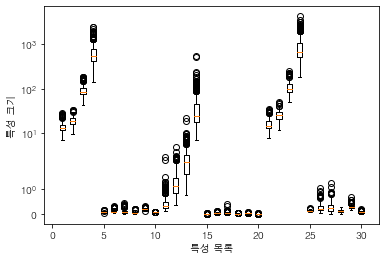

In [42]:
#boxplot에 xticks가 존재하지 않음
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

In [43]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training=X_train.min(axis=0)
#훈련 세트에서 특성별 범위(최대-최소)계산
range_on_training=(X_train-min_on_training).max(axis=0)

#훈련데이터에 최솟값을 빼고 범위로 나누면 
#각 특성에 대해 최솟값은 0 최댓값은 1
X_train_scaled=(X_train-min_on_training)/range_on_training
print("특성별 최솟값\n",X_train_scaled.min(axis=0))
print("특성별 최솟값\n",X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최솟값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [44]:
# 테스트 세트에도 같은 작업 적용하지만
#훈련 세트에서 계산한 최솟값과 범위를 사용
X_test_scaled=(X_test-min_on_training)/range_on_training

svc=SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도:{:.3f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 정확도:{:.3f}".format(svc.score(X_test_scaled,y_test)))
#데이터 전처리 한 이후

훈련 세트 정확도:0.984
테스트 세트 정확도:0.972


데이터 전처리 하기 전에 비해 데이터 전처리 한 이후엔 훈련세트 정확도와 테스트 세트 정확도 모두 올라갔다.

In [45]:
svc=SVC(C=1000)
svc.fit(X_train_scaled,y_train)

print("훈련 세트 정확도:{:.3f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 정확도:{:.3f}".format(svc.score(X_test_scaled,y_test)))
#C를 1000으로 하면 과대적합이 일어나며

훈련 세트 정확도:1.000
테스트 세트 정확도:0.958


In [46]:
svc=SVC(C=20)
svc.fit(X_train_scaled,y_train)

print("훈련 세트 정확도:{:.3f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 정확도:{:.3f}".format(svc.score(X_test_scaled,y_test)))
#C를 20정도로 낮추니 모델의 성능이 좋아졌다.

훈련 세트 정확도:0.988
테스트 세트 정확도:0.979


# 신경망(딥러닝)

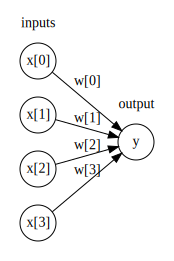

In [80]:
display(mglearn.plots.plot_logistic_regression_graph())
#입력 특성과 예측은 노드로, 계수는 노드 사이의 연결로 나타낸 로지스틱 회귀이다.
#왼쪽 노드는 입력의 특성을 나타내고 연결선은 학습된 계수를 표현하고 오른쪽 노드는 입력의 가중치 합, 즉 출력을 나타낸다.

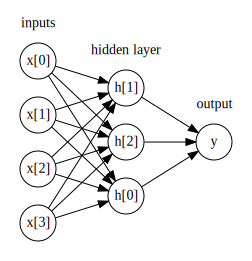

In [48]:
display(mglearn.plots.plot_single_hidden_layer_graph())
#은닉층이 하나인 다층 퍼셉트론(MLP)이다.
#MLP에서는 가중치의 합을 만드는 과정이 여러 번 반복된다.
#중간단계를 구성하는 은닉유닛을 계산하고 이를 이용하여 최종 결과를 산출하기 위해 다시 가중치 합을 계산한다.

Text(0, 0.5, 'relu(x), tanh(x)')

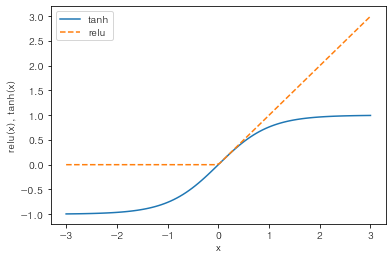

In [50]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle= '--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")
#각 은닉 유닛의 가중치 합을 계산한 후 그 결과에 비선형 함수인 렐루나 하이퍼볼릭 탄젠트를 적용한다.

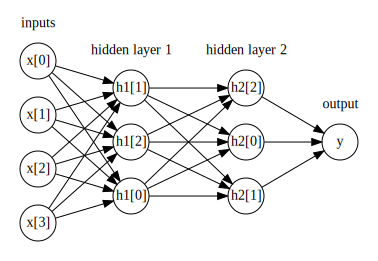

In [51]:
mglearn.plots.plot_two_hidden_layer_graph()
#은닉층이 두개인 다층 퍼셉트론이다.

Text(0, 0.5, '특성 1')

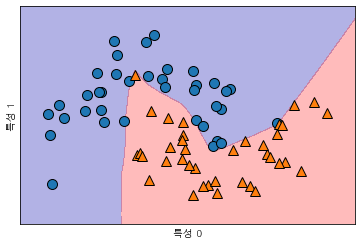

In [52]:
#신경망 튜닝
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=100,noise=0.25,random_state=3)

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y, random_state=42)

mlp=MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
#은닉 유닛이 100개ㅑ인 신경망으로 학습시킨 two_moons 데이터셋의 결정경계이다.

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, '특성 1')

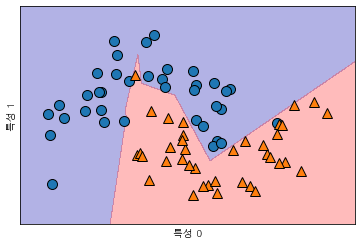

In [53]:
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
#은닉 유닛이 10개인 신경망으로 학습시킨 two_moons 데이터셋의 결정경계이다.

Text(0, 0.5, '특성 1')

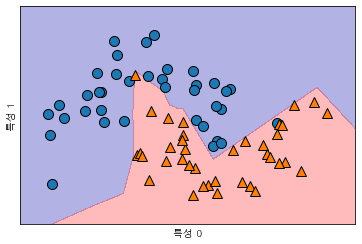

In [54]:
#10개의 유닛으로 된 두 개의 은닉층
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
#10개의 은닉유닛을 가진 두 개의 은닉층과 렐루 활성화 함수로 만든 결정경계이다.

Text(0, 0.5, '특성 1')

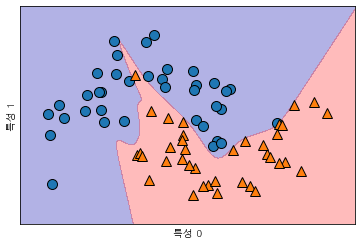

In [55]:
#tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp=MLPClassifier(solver='lbfgs',activation='tanh',random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
#10개의 은닉 유닛을 가진 두 개의 은닉층과 tanh 활성화 함수로 만든 결정 경계이다.

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

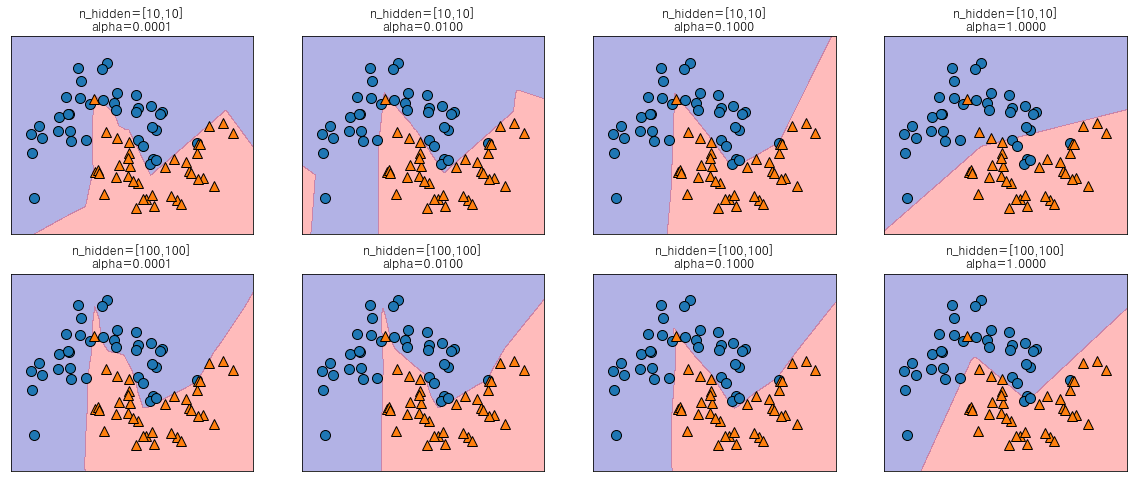

In [56]:
fig,axes=plt.subplots(2,4,figsize=(20,8))
for axx,n_hidden_nodes in zip(axes,[10,100]):
    for ax,alpha in zip(axx,[0.0001,0.01,0.1,1]):
        mlp=MLPClassifier(solver='lbfgs',random_state=0,
                          hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],
                          alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(
            n_hidden_nodes,n_hidden_nodes,alpha))
#은닉 유닛과 alpha 매개변수에 따라 변하는 결정경계

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


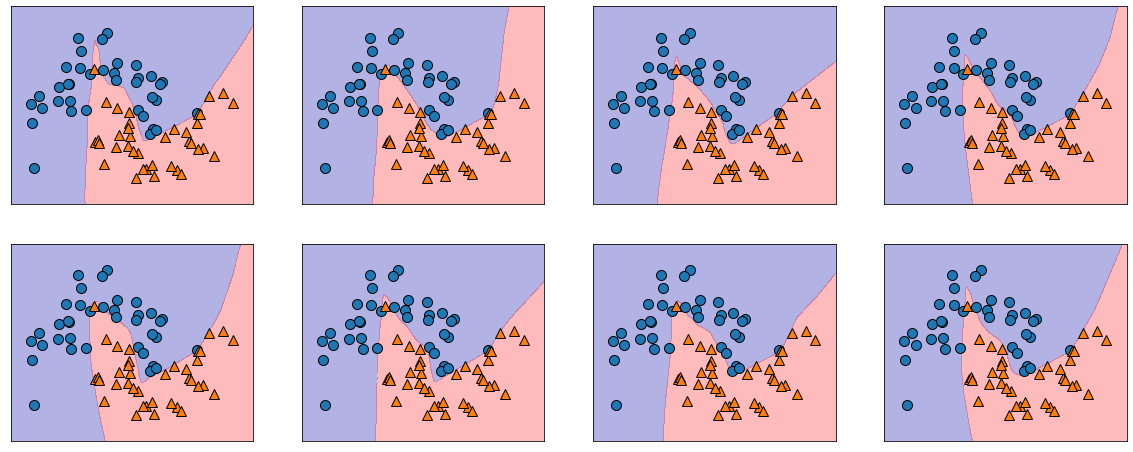

In [57]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
#무작위로 다른 초깃값을 주되 같은 매개변수로 학습한 결정 경계

In [62]:
print("유방암 데이터의 특성별 최댓값:\n",cancer.data.max(axis=0))

유방암 데이터의 특성별 최댓값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [63]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

print("훈련 세트 정확도:{:.2f}".format(mlp.score(X_train,y_train)))
print("테스트 세트 정확도:{:.2f}".format(mlp.score(X_test,y_test)))

훈련 세트 정확도:0.94
테스트 세트 정확도:0.92


In [64]:
#훈련 세트 각 특성의 평균 계산
mean_on_train=X_train.mean(axis=0)
#훈련 세트 각 특성의 표준 편차 계산
std_on_train=X_train.std(axis=0)

#데이터에서 평균 빼고 표준 편차로 나누면 평균=0, 표준편차=1인 데이터로 변환됨
X_train_scaled=(X_train-mean_on_train)/std_on_train
#테스트 세트에도 변환
X_test_scaled=(X_test-mean_on_train)/std_on_train

mlp=MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)

print("훈련 세트 정확도:{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도:0.991
테스트 세트 정확도:0.965


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [65]:
mlp=MLPClassifier(max_iter=1000,random_state=0)
mlp.fit(X_train_scaled,y_train)

print("훈련 세트 정확도:{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.972


In [66]:
mlp=MLPClassifier(max_iter=1000,alpha=1,random_state=0)
#alpha를 0.0001에서 1로 증가시킴
mlp.fit(X_train_scaled,y_train)

print("훈련 세트 정확도:{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도:0.988
테스트 세트 정확도:0.972


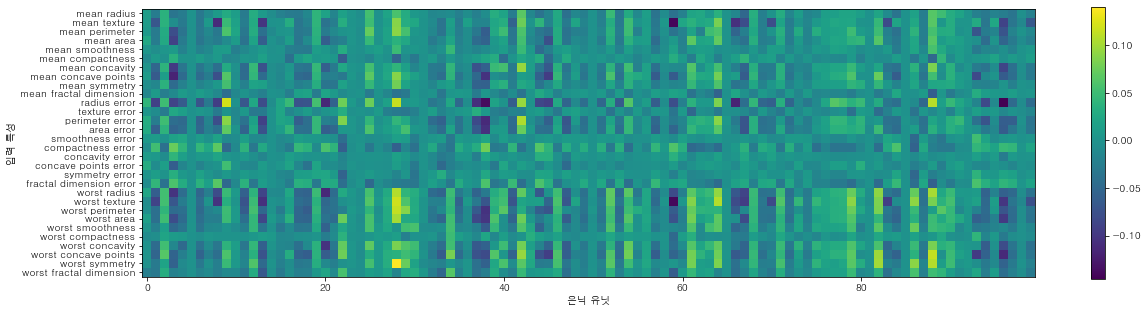

In [67]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()
#모든 은닉 유닛에서 작은 가중치를 가진 특성은 모델에 덜 중요하다고 추론할 수 있다.

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X,y = make_circles(noise=0.25, factor=0.5, random_state=1)

#예제를 위해 클래스의 이름을 "blue"와 "red"로 바꾼다
y_named = np.array(["blue", "red"])[y]
#여러 개의 배열을 한꺼번에 train_test_split에 넣을 수 있다.
#훈련 세트와 테스트 세트로 나뉘는 방식은 모두 똑같다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test=\
train_test_split(X, y_named, y, random_state = 0)

#그레디언트 부스팅 모델을 만든다
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

In [78]:
print("X_test.shape:",X_test.shape)
print("결정 함수의 결과 형태:{}".format(gbrt.decision_function(X_test).shape))
print("결정 함수 결과:\n{}".format(gbrt.decision_function(X_test)))
print("예측 확률:\n{}".format(gbrt.predict_proba(X_test)[:6]))
print("예측:\n{}".format(gbrt.predict(X_test)))

X_test.shape: (25, 2)
결정 함수의 결과 형태:(25,)
결정 함수 결과:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081
 -7.69097179  4.11001686  1.10753937  3.40782222 -6.46255955  4.28986642
  3.90156346 -1.20031247  3.66166081 -4.17231157 -1.23010079 -3.91576223
  4.03602783  4.11001686  4.11001686  0.65709014  2.69826265 -2.65673274
 -1.86776596]
예측 확률:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]
예측:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


신경망은 대량의 데이터에 내재된 정보를 잡아내고 매우 복잡한 모델을 만들 수 있다. 충분한 연산 시간과 데이터를 주고 매개변수를 세심하게 조정하면 신경망은 종종 다른 머신러닝 알고리즘을 뛰어넘는 성능을 보인다.

신경망은 종종 학습이 오래걸릴 뿐만 아니라 전처리에 주의해야 한다는 단점을 가지고 있다.